# Analyze Spectra Data Collected from Plate Reader for Phagocytosis Assay

Import appropriate libraries and csv file. 

In [12]:
import numpy as np


In [13]:
%matplotlib inline

In [14]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import well_function as wells

In [15]:
fig=plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

In [16]:
fileName = "C:/Users/ekrue/Documents/Grad School/PKH Lab/Data/phagocytosis_data_8_5_22/phagocytosis_spectra_8_5_22.csv"

Function to Edit CSV File and Store Averages of Triplicates that were Collected

In [17]:
def wells(fileName = None,cols= ["E07","E08","E09"]):
    df = pd.read_csv(fileName) # read csv file that was defined in previous block
    dft = df.transpose() # transpose data
    df = dft 
    df.columns = df.iloc[0] # replace header with first row
    #df.drop(['Well','Content'])
    #df.loc["Well"]
    # stupid nan, I'm grabbing the column by using the name of the first column
    nameFirstCol = df.columns[9]
    print(nameFirstCol)
    wavelengths = np.array ( df[ nameFirstCol  ]  )
    wavelengths = wavelengths[2:,2].astype(float) # still has E01/Sample in first two entries, so skipping here
    well_condition = cols 
    print(wavelengths)
    print( np.shape( wavelengths ))  # create array to hold data
    numValues = np.shape( wavelengths )[0]
    numCtls = len(well_condition) # since its a string 

    data = np.zeros([numCtls,numValues])
    print(np.shape(data))
    for i, label in enumerate( well_condition ):
        print(i,label)

        idata = np.array( df[label])
        data[i,] = idata[2:]


    well_condition_avg = np.average(data,axis=0) # average the triplicates
    well_condition_standard= np.std(data,axis=0) #Standard deviation
    output= {"wavelengths":wavelengths,
             "average": well_condition_avg, 
             "standard_deviation": well_condition_standard}
    return output

In [18]:
all_data={}
cols_names={"positive_control": ["E07","E08","E09"],
           "negative_control": ["E10","E11","E12"],
           "DMSO": ["F07","F08","F09"],
           "50um_LY294": ["F10","F11","F12"],
            "65um_LY294": ["G07","G08","G09"],
           "75um_LY294": ["G10","G11","G12"],
           "85um_LY294": ["H07","H08","H09"],
           "95um_LY294": ["H10","H11","H12"]}
data_path="C:/Users/ekrue/Documents/Grad School/PKH Lab/Data/phagocytosis_data_8_5_22/phagocytosis_spectra_8_5_22.csv"
for key in cols_names.keys():
    print(key)
    output= wells(fileName=data_path, cols=cols_names[key])
    all_data[key]=output

positive_control
nan
[510. 511. 512. 513. 514. 515. 516. 517. 518. 519. 520. 521. 522. 523.
 524. 525. 526. 527. 528. 529. 530. 531. 532. 533. 534. 535. 536. 537.
 538. 539. 540. 541. 542. 543. 544. 545. 546. 547. 548. 549. 550. 551.
 552. 553. 554. 555. 556. 557. 558. 559. 560. 561. 562. 563. 564. 565.
 566. 567. 568. 569. 570. 571. 572. 573. 574. 575. 576. 577. 578. 579.
 580. 581. 582. 583. 584. 585. 586. 587. 588. 589. 590. 591. 592. 593.
 594. 595. 596. 597. 598. 599. 600. 601. 602. 603. 604. 605. 606. 607.
 608. 609. 610. 611. 612. 613. 614. 615. 616. 617. 618. 619. 620. 621.
 622. 623. 624. 625. 626. 627. 628. 629. 630. 631. 632. 633. 634. 635.
 636. 637. 638. 639. 640. 641. 642. 643. 644. 645. 646. 647. 648. 649.
 650. 651. 652. 653. 654. 655. 656. 657. 658. 659. 660. 661. 662. 663.
 664. 665. 666. 667. 668. 669. 670. 671. 672. 673. 674. 675. 676. 677.
 678. 679. 680. 681. 682. 683. 684. 685. 686. 687. 688. 689. 690. 691.
 692. 693. 694. 695. 696. 697. 698. 699. 700. 701. 702.]

Plot Relevant Graphs

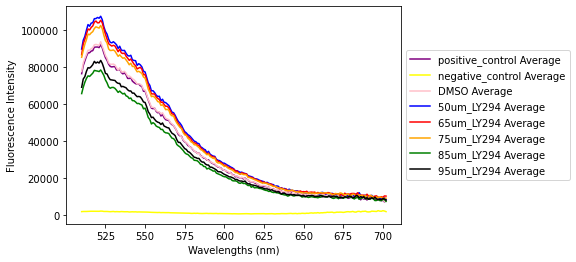

In [19]:
#Create graph comparing all controls and experimental conditions (all colors without error bars)

myCases=["positive_control","negative_control","DMSO","50um_LY294","65um_LY294","75um_LY294","85um_LY294","95um_LY294"]
myColors=["purple","yellow", "pink", "blue","red","orange","green","black"]
for i,key in enumerate(myCases):
    output=all_data[key]
    wavelengths=output["wavelengths"]
    average=output["average"]
    standard_deviation=output["standard_deviation"]
    myColor=myColors[i]
    plt.plot(wavelengths,average,myColor,label='{} Average'.format(key),)
    #plt.errorbar(wavelengths[::5],average[::5],yerr=standard_deviation[::5], color=myColor)
    plt.xlabel('Wavelengths (nm)')
    plt.ylabel('Fluorescence Intensity')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

plt.savefig("phagocytosis_8_5_22_1.jpg",bbox_inches='tight',dpi=500)

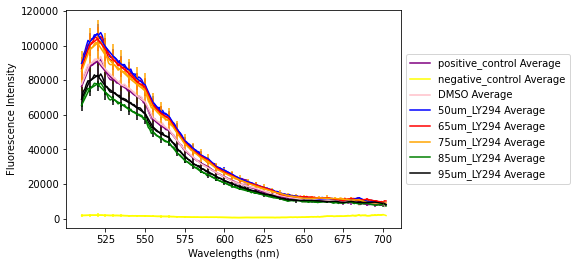

In [20]:
#Create graph comparing all controls and experimental conditions (all colors with error bars)

myCases=["positive_control","negative_control","DMSO","50um_LY294","65um_LY294","75um_LY294","85um_LY294","95um_LY294"]
myColors=["purple","yellow", "pink", "blue","red","orange","green","black"]
for i,key in enumerate(myCases):
    output=all_data[key]
    wavelengths=output["wavelengths"]
    average=output["average"]
    standard_deviation=output["standard_deviation"]
    myColor=myColors[i]
    plt.plot(wavelengths,average,myColor,label='{} Average'.format(key),)
    plt.errorbar(wavelengths[::5],average[::5],yerr=standard_deviation[::5], color=myColor)
    plt.xlabel('Wavelengths (nm)')
    plt.ylabel('Fluorescence Intensity')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

plt.savefig("phagocytosis_8_5_22_2.jpg",bbox_inches='tight',dpi=500)

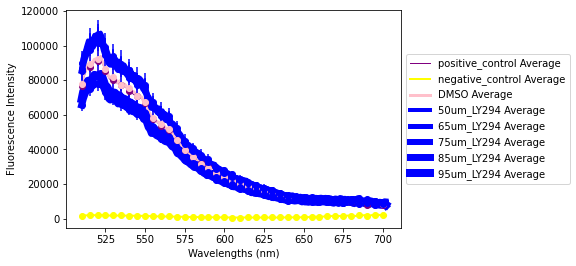

In [21]:
#Create graph comparing all controls and experimental conditions (line width and colors)

myCases=["positive_control","negative_control","DMSO","50um_LY294","65um_LY294","75um_LY294","85um_LY294","95um_LY294"]
myColors=["purple","yellow", "pink", "blue","blue","blue","blue","blue"]
for i,key in enumerate(myCases):
    output=all_data[key]
    wavelengths=output["wavelengths"]
    average=output["average"]
    standard_deviation=output["standard_deviation"]
    myColor=myColors[i]
    plt.plot(wavelengths,average,myColor,label='{} Average'.format(key), linewidth=i+1)
    plt.errorbar(wavelengths[::5],average[::5],yerr=standard_deviation[::5],fmt="o", color=myColor)
    plt.xlabel('Wavelengths (nm)')
    plt.ylabel('Fluorescence Intensity')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

plt.savefig("phagocytosis_8_5_22_3.jpg",bbox_inches='tight',dpi=500)